# Heart Disease Prediction by ML

### Import Library

In [3]:
import pandas as pd
import numpy as np  #Matrix Multiplication
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.express as px
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from collections import Counter
from xgboost import XGBClassifier

# load the dataset

In [4]:
csv_file_path = r'C:\Users\HP\Desktop\ML\ml_project\heart.csv'

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)



In [4]:
df.head()  #top 5 row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploratory Data Analysis 

 Data Description

In [40]:
df.shape  

(1025, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [43]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#Exploring Features/Target

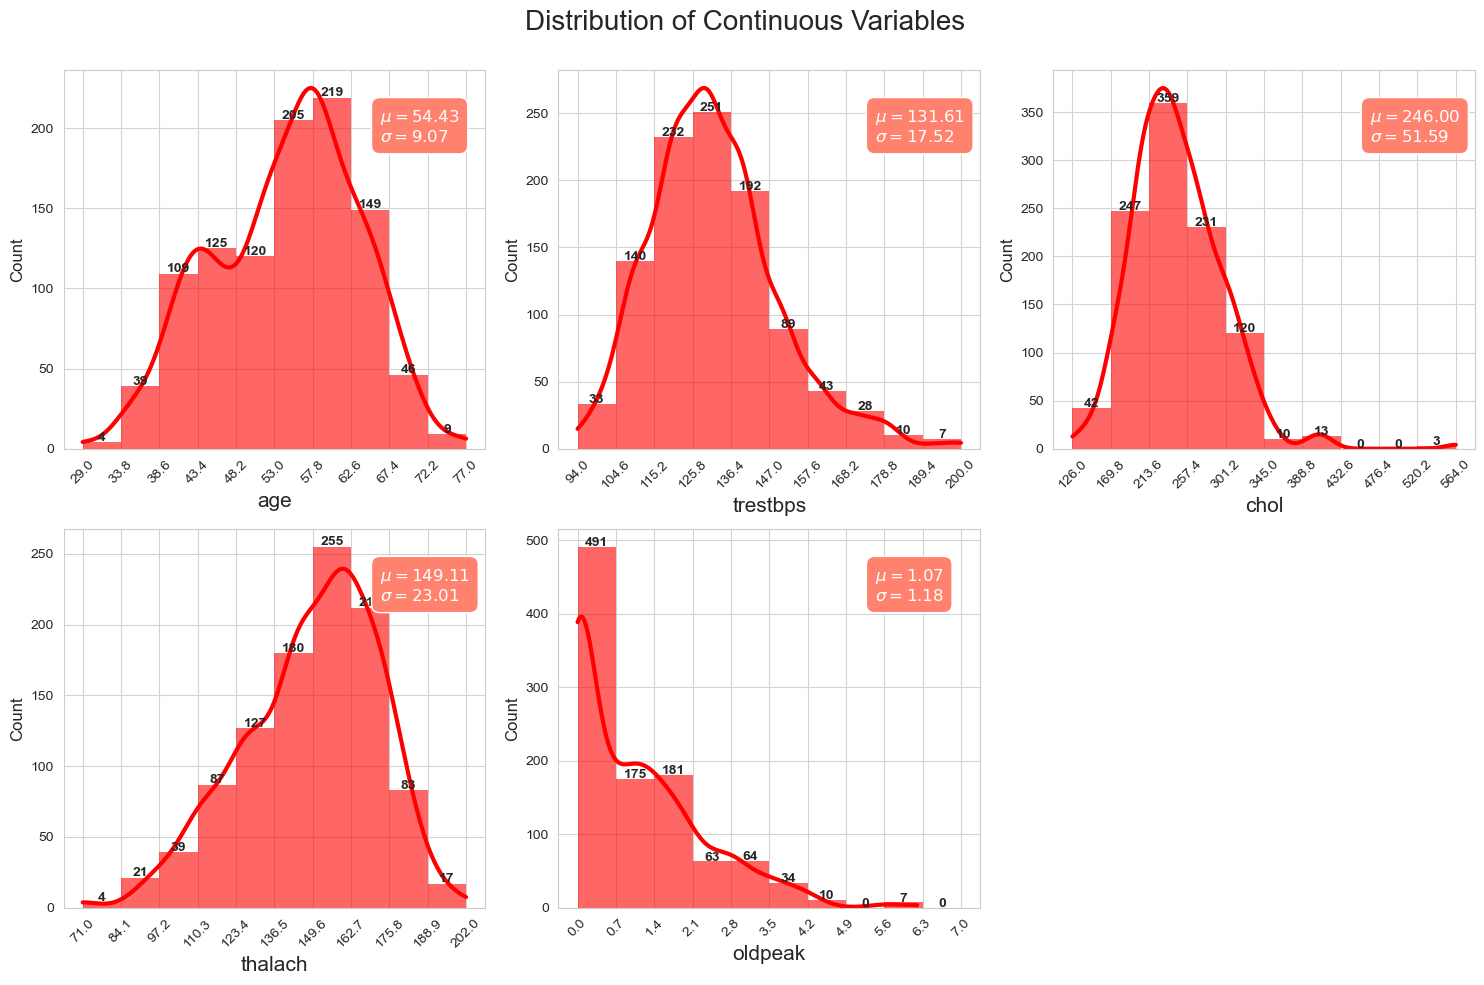

In [81]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [45]:
#0 = Female, 1 = Male
sex_count=df['sex'].value_counts().reset_index(name='Count')
sex_count



,sex,Count
0,1,713
1,0,312


In [47]:
 
df['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [48]:
px.pie(df,'cp', title='Chest Pain Type Distribution',color_discrete_sequence=px.colors.sequential.RdBu) 

In [51]:
px.pie(df,'fbs', title='Fasting Blood Sugar Distribution',color_discrete_sequence=px.colors.sequential.RdBu)

In [52]:
px.pie(df,'restecg', title='Resting ECG Results Distribution',color_discrete_sequence=px.colors.sequential.RdBu)

In [71]:
px.pie(df,'exang', title='exercise-induced angina :',color_discrete_sequence=px.colors.sequential.RdBu)

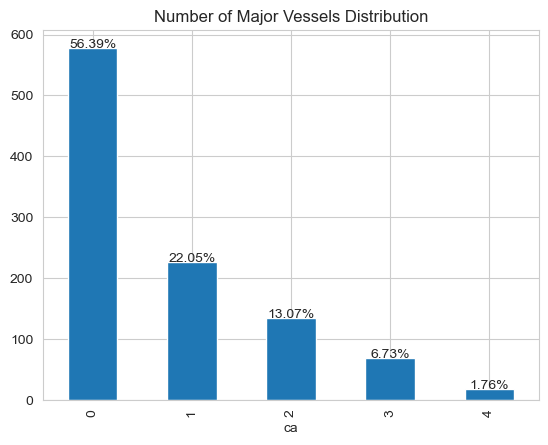

In [75]:
# Assuming df is your DataFrame
value_counts = df['ca'].value_counts()

# Calculate percentages
total_count = value_counts.sum()
percentage_values = (value_counts / total_count) * 100

# Create the bar plot
ax = value_counts.plot(kind='bar', title='Number of Major Vessels Distribution')

# Add percentage labels to each bar
for i, v in enumerate(value_counts):
    percentage = percentage_values.iloc[i]
    ax.text(i, v + 0.5, f'{percentage:.2f}%', ha='center')

# Show the plot
plt.show()

In [69]:
px.pie(df,'thal', title='Thalium stress test result:',color_discrete_sequence=px.colors.sequential.RdBu)

In [57]:
target_count=df['target'].value_counts().reset_index(name='Count')
target_count

,target,Count
0,1,526
1,0,499


In [58]:
px.pie(target_count,names='target',values='Count', title='Target Distribution',color_discrete_sequence=px.colors.sequential.RdBu)

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Correlation Analysis

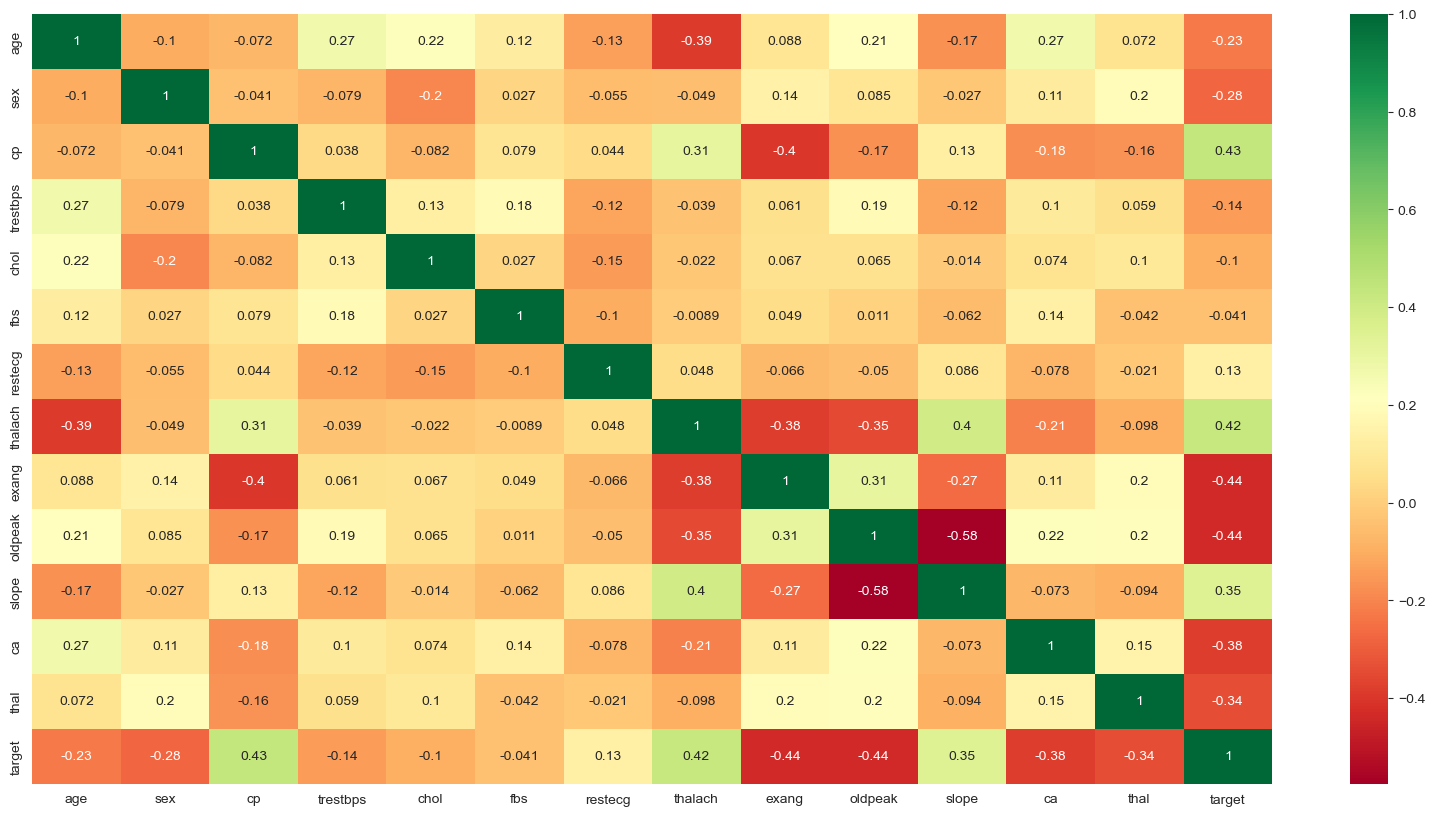

In [64]:

# to see the correlation of different attributes
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot Heat Map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Data Preprocessing

Checking Null Values

In [61]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Encoding Categorical Variables

In [ ]:
# Implementing one-hot encoding on the specified categorical features
dataset= pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

 Scaling

In [ ]:
standardScaler=StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale]=standardScaler.fit_transform(dataset[columns_to_scale])

# Splitting data into train and test sets

In [24]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [89]:
y = df['target']
x = df.drop('target',axis=1)
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [90]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 423, 0: 397})

# Traning different machine learning Algorithms

# Logistic Regression

In [86]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model= lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
print ("Confussion Mtarix")
print (lr_conf_matrix)
print ("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print ("classification_report")
print (classification_report(y_test,lr_predict))

Confussion Mtarix
[[73 29]
 [13 90]]


Accuracy of Logistic Regression: 79.51219512195122 

classification_report
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



# Naive Bayes

In [85]:
m2 = 'Naive Bayes'
nb = GaussianNB()
model=nb.fit(x_train,y_train)
nb_predict = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test,nb_predict)
nb_acc_score = accuracy_score(y_test,nb_predict)
print ("Confussion Mtarix")
print (nb_conf_matrix)
print ("\n")
print("Accuracy of Naive Bayes:",nb_acc_score*100,'\n')
print ("classification_report")
print (classification_report(y_test,nb_predict))

Confussion Mtarix
[[72 30]
 [11 92]]


Accuracy of Naive Bayes: 80.0 

classification_report
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# Random Forest Classifier

In [29]:
m3 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=10,random_state=2,max_depth=5)
model=rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_acc_score = accuracy_score(y_test,rf_predict)
print ("Confussion Mtarix")
print (rf_conf_matrix)
print ("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')
print ("classification_report")
print (classification_report(y_test,rf_predict))

Confussion Mtarix
[[81 21]
 [ 7 96]]


Accuracy of Random Forest Classifier: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       102
           1       0.82      0.93      0.87       103

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



# KNN Classifier

In [30]:
#applying KNN Classifier & find the Value of 'K'
knn_score =[]
for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn,x,y,cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'k Neighbors Classifier Scores for Different K-Values')

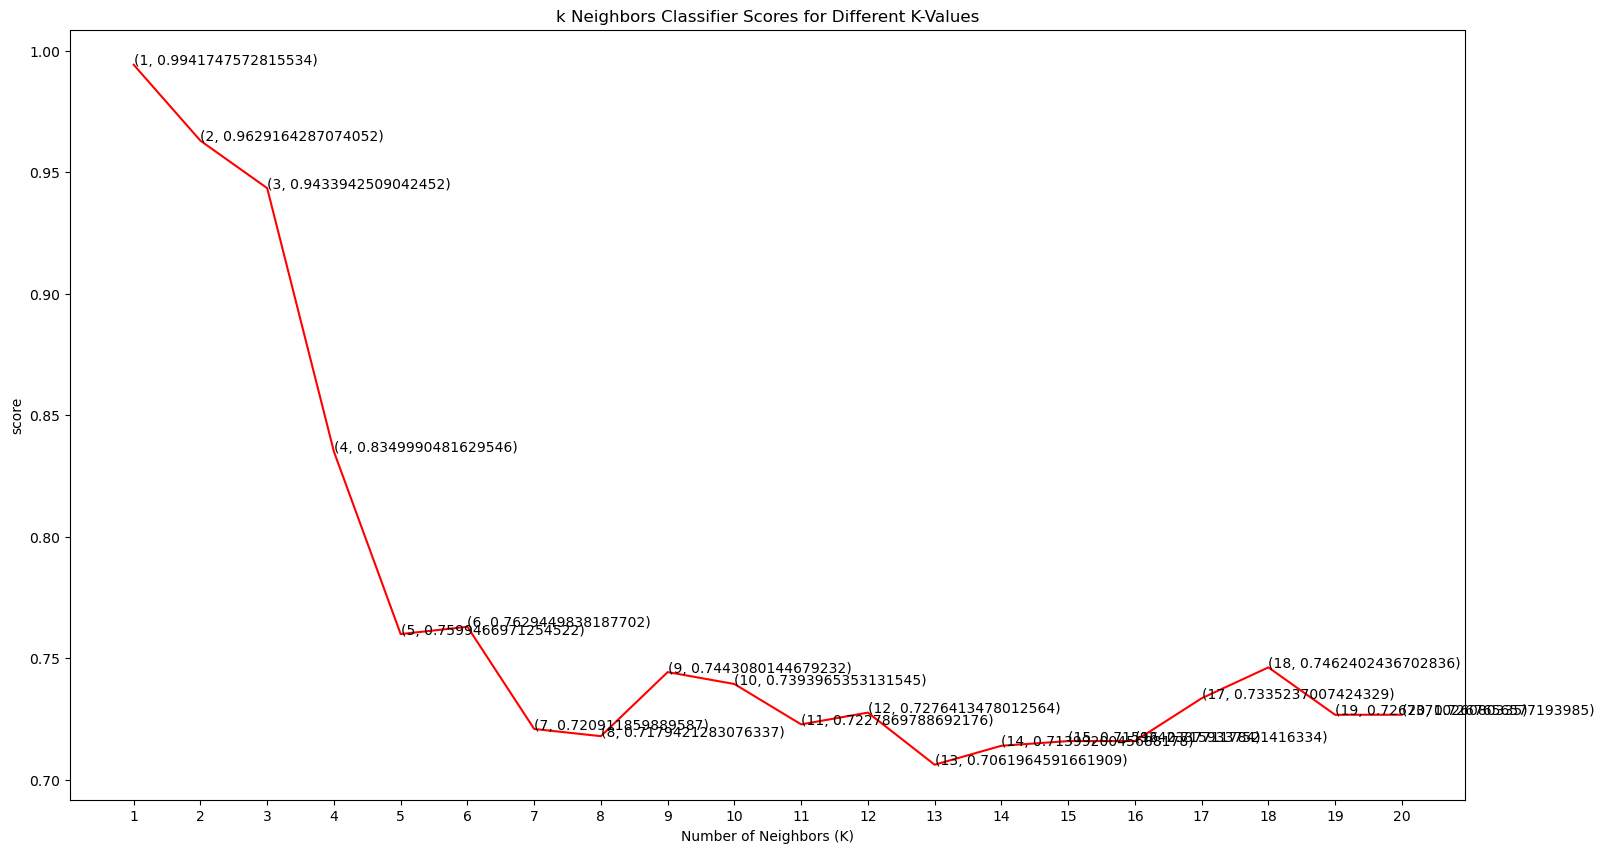

In [31]:
fig= plt.figure(figsize=(18,10))
plt.plot([k for k in range(1,21)],knn_score,color='red')
for i in range (1,21):
         plt.text(i,knn_score[i-1],(i,knn_score[i-1]))
plt.xticks([i for i in range (1,21)]) 
plt.xlabel('Number of Neighbors (K)') 
plt.ylabel('score')
plt.title ('k Neighbors Classifier Scores for Different K-Values')

In [32]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=19)
model=knn.fit(x_train,y_train)
knn_predict = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test,knn_predict)
knn_acc_score = accuracy_score(y_test,knn_predict)
print ("Confussion Mtarix")
print (knn_conf_matrix)
print ("\n")
print("Accuracy of K-Neighbors Classifier:",knn_acc_score*100,'\n')
print ("classification_report")
print (classification_report(y_test,knn_predict))

Confussion Mtarix
[[79 23]
 [12 91]]


Accuracy of K-Neighbors Classifier: 82.92682926829268 

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       102
           1       0.80      0.88      0.84       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



In [87]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=6)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test,dt_predict)
dt_acc_score = accuracy_score(y_test,dt_predict)
print ("Confussion Mtarix")
print (dt_conf_matrix)
print ("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc_score*100,'\n')
print ("classification_report")
print (classification_report(y_test,dt_predict))

Confussion Mtarix
[[81 21]
 [ 5 98]]


Accuracy of Decision Tree Classifier: 87.3170731707317 

classification_report
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       102
           1       0.82      0.95      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



# Support Vector Classifier

In [88]:
m6 = 'Support Vector Classifier'
svc = SVC(kernel='rbf',C=2)
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test,svc_predict)
svc_acc_score = accuracy_score(y_test,svc_predict)
print ("Confussion Mtarix")
print (svc_conf_matrix)
print ("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print ("classification_report")
print (classification_report(y_test,svc_predict))

Confussion Mtarix
[[91 11]
 [ 5 98]]


Accuracy of Support Vector Classifier: 92.19512195121952 

classification_report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       102
           1       0.90      0.95      0.92       103

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



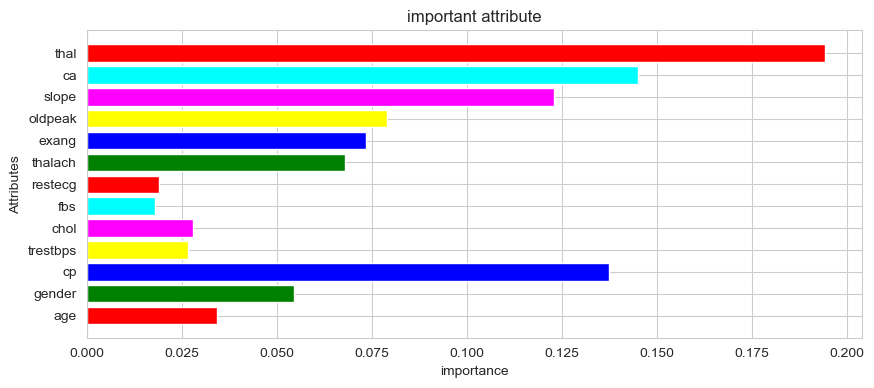

In [82]:
fig=plt.figure(figsize=(10,4))
colors=["red","green","blue","yellow","magenta","cyan"]
imp_feature =pd.DataFrame({'feature':['age','gender','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal',],'importance':xgb.feature_importances_})
plt.title("important attribute")
plt.xlabel("importance")
plt.ylabel("Attributes")
plt.barh(imp_feature['feature'],imp_feature['importance'],color=colors)
plt.show()

# ROC CURVE

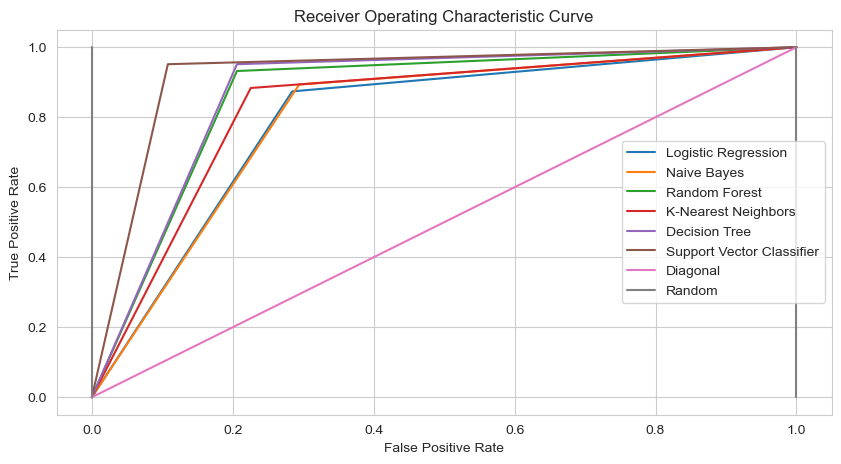

In [84]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict)

knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')

plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbors')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],[0,1],label='Diagonal')
plt.plot([0,0],[1,0],c='.5',label='Random')
plt.plot([1,1],[0,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# COMPARITIVE ANALYSIS

In [38]:

scores = [lr_acc_score*100,nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,xgb_acc_score*100]
algorithms = ["Logistic Regression","Naive Bayes","Random forest","K-Nearest Neighbors","Decision Tree","svm","xgboost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 79.51219512195122 %
The accuracy score achieved using Naive Bayes is: 80.0 %
The accuracy score achieved using Random forest is: 86.34146341463415 %
The accuracy score achieved using K-Nearest Neighbors is: 82.92682926829268 %
The accuracy score achieved using Decision Tree is: 87.3170731707317 %
The accuracy score achieved using svm is: 92.19512195121952 %
The accuracy score achieved using xgboost is: 84.39024390243902 %


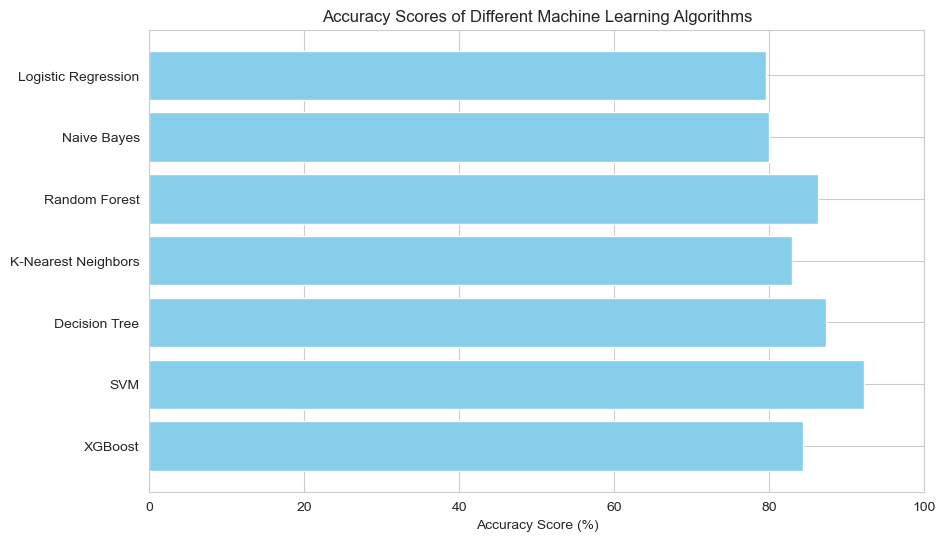

In [39]:
import matplotlib.pyplot as plt

# Data
scores = [lr_acc_score*100, nb_acc_score*100, rf_acc_score*100, knn_acc_score*100, dt_acc_score*100, svc_acc_score*100, xgb_acc_score*100]
algorithms = ["Logistic Regression", "Naive Bayes", "Random Forest", "K-Nearest Neighbors", "Decision Tree", "SVM", "XGBoost"]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(algorithms, scores, color='skyblue')
plt.xlabel('Accuracy Score (%)')
plt.title('Accuracy Scores of Different Machine Learning Algorithms')
plt.xlim(0, 100)  # Limiting x-axis from 0 to 100
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score on top
plt.show()
